# Perceptron Model

##### The Perceptron is one of the simplest artificial neural network algorithms. It is used for supervised learning of binary clusters and involves giving inputs with documented outputs. The main concept behind the Perceptron is like the neuron of a nervous system, where each neuron receives thousands of signals from other neurons connected via synapses. In this case, the Perceptron represents one neuron, and the synapses are represented by the weights and biases.

In [1]:
# import the necessary libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# import datasets from sklearn which contains the iris data
from sklearn import datasets

# load the iris data (specifying type as data frames)
iris = datasets.load_iris(as_frame=True)

In [3]:
df = iris.frame
df = df.iloc[:100]
df


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
95,5.7,3.0,4.2,1.2,1
96,5.7,2.9,4.2,1.3,1
97,6.2,2.9,4.3,1.3,1
98,5.1,2.5,3.0,1.1,1


In [7]:
df_classify = df[["sepal length (cm)", "sepal width (cm)", "target"]]
df_classify["ones"] = np.ones(100)

<ipython-input-7-ade4883369f3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_classify["ones"] = np.ones(100)


In [8]:
for i in range(100):
    if df_classify["target"].iloc[i] == 0:
        df_classify["target"].iloc[i] = 1.0
    else:
        df_classify["target"].iloc[i] = -1.0

<ipython-input-8-cfa85bbbd62c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_classify["target"].iloc[i] = 1.0
<ipython-input-8-cfa85bbbd62c>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_classify["target"].iloc[i] = -1.0


In [9]:
X = df_classify[["sepal length (cm)", "sepal width (cm)", "ones"]].to_numpy()
y = df_classify["target"].to_numpy()

Text(0.5, 1.0, 'Iris Data Plot')

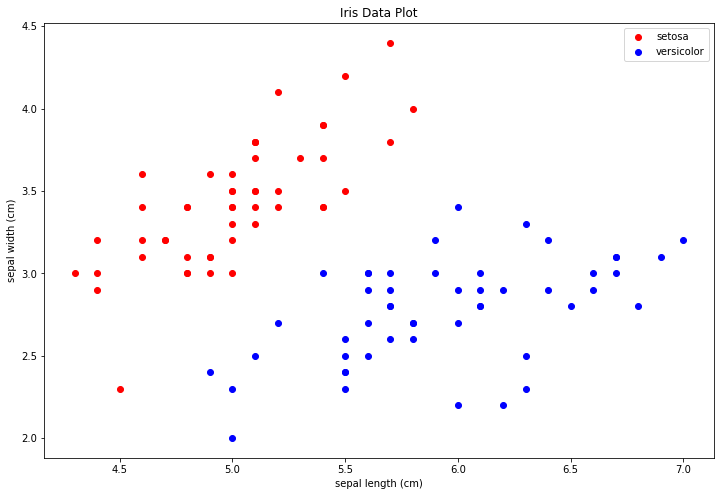

In [10]:
X[0]
plt.figure(figsize = (12, 8))

plt.scatter(X[:50, 0],
            X[:50, 1], 
            label = 'setosa', 
            color = 'r')

plt.scatter(X[50:, 0], 
            X[50:, 1], 
            label = 'versicolor', 
            color = 'blue')

plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.legend()
plt.title("Iris Data Plot")

In [12]:
def sign(x, y):
    # the input vectors here should be numpy arrays
    if x @ y > 0:
        return 1.0
    else:
        return -1.0
    
def L(w, features = X, labels = y):
    return sum(.5*(sign(w, x) - labels[i])**2 for i, x in enumerate(features))
       

In [13]:
w = np.random.rand(3)
print(L(w))

100.0
